In [242]:
# imports
from vega_datasets import data
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

## TEMPERATURE DATA QUESTIONS

In [19]:
# acquiring data 
df = data.sf_temps()

# setting data column as index then sorting by date
df = df.set_index('date').sort_index()

# previewing data
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


### Resample by the day and take the average temperature. 

In [35]:
# resanpling by day and showing avg. temp on each day
avg_day_temp = df.resample('D').mean()

# previewing data
avg_day_temp.head()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667


### Visualize the average temperature over time.

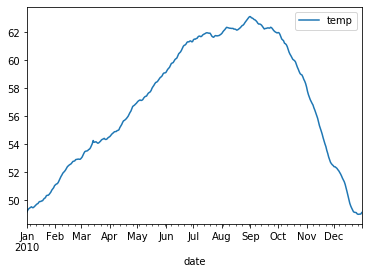

In [37]:
# plotting temp over time
avg_day_temp.plot()

### Write the code necessary to visualize the minimum temperature over time.

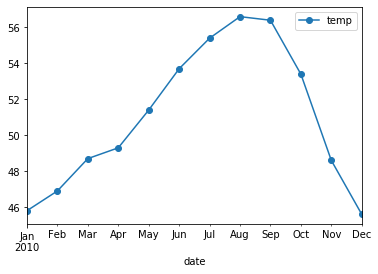

In [39]:
# resampling by month and holding lowest temp each month
min_month_temp = df.resample('M').min()

# plotting min temp each month throughout year
min_month_temp.plot(marker='o')

### Write the code necessary to visualize the maximum temperature over time.

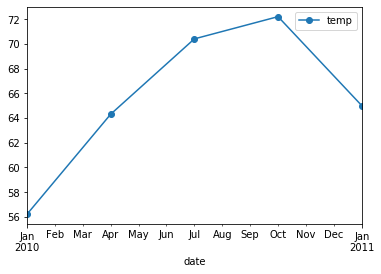

In [40]:
# resampling to hold max temp every 3 months
max_3month_temp = df.resample('3M').max()

# plotting to show max temp every 3 months
max_3month_temp.plot(marker='o')

### Which month is the coldest, on average?

In [277]:
# resampling per month and showing average temp
month_avg_temp = df.resample('M').mean()

# finding month with temp that matches lowest temp in DF
month_avg_temp[month_avg_temp.temp == month_avg_temp.temp.min()]

,temp
date,
2010-01-31,49.98414


In [268]:
print('January is the coldest month on average.')

January is the coldest month on average.


### Which month has the highest average temperature?

In [74]:
# using previous DF
# finding month with avg temp matching highest temp in df
month_avg_temp[month_avg_temp.temp == month_avg_temp.temp.max()]

,temp
date,
2010-09-30,62.487083


In [75]:
print('January is the warmest month on average.')

January is the warmest month on average.


### Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). 

In [102]:
# resampling by day and holding highest and lowest temp on each day
min_max_day_temp = df.resample('D').agg(['min', 'max'])

# displaying data
min_max_day_temp.head()

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8

### Use this resampled dataframe to calculate the change in temperature for the day. 

In [104]:
# creating new column to hold difference between highest and lowest temp each day
min_max_day_temp['temp_change'] = min_max_day_temp.temp['max'] - min_max_day_temp.temp['min']

# displaying df
min_max_day_temp

temp       temp_change
             min   max            
date                              
2010-01-01  45.8  53.3         7.5
2010-01-02  46.0  53.4         7.4
2010-01-03  46.1  53.5         7.4
2010-01-04  46.1  53.6         7.5
2010-01-05  46.1  53.8         7.7
...          ...   ...         ...
2010-12-27  45.6  53.2         7.6
2010-12-28  45.6  53.2         7.6
2010-12-29  45.6  53.2         7.6
2010-12-30  45.6  53.2         7.6
2010-12-31  45.8  53.2         7.4

[365 rows x 3 columns]

### Which month has the highest daily temperature variability?

In [ ]:
# dropping temp columns to simplify df
temp_change_df = min_max_day_temp.drop(columns = 'temp')

In [133]:
# resampling by month and showing avg temp change in each month
avg_temp_change_month = temp_change_df.resample('M').mean()

# finding month with temp_change equal to the max temp change value
avg_temp_change_month[avg_temp_change_month.temp_change == avg_temp_change_month.temp_change.max()]

,temp_change
,
date,
2010-09-30,14.403333


In [134]:
print('September has the highest daily temperature variability.')

September has the highest daily temperature variability.


## WEATHER DATA QUESTIONS

In [341]:
# acquiring data
wdf = data.seattle_weather()

# setting data as index and sorting
wdf = wdf.set_index('date').sort_index()

# previewing data
wdf.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


#### Which year and month combination has the highest amount of precipitation?

In [173]:
# resampling by month and holding avg. precipitation for each month
month_avg_prec = pd.DataFrame(wdf['precipitation'].resample('M').mean())

# finding month that had the highest avg. precipitation
month_avg_prec[month_avg_prec.precipitation == month_avg_prec.precipitation.max()]

,precipitation
date,
2015-12-31,9.177419


In [174]:
print('December 2015 had the highest amount of precipitation.')

December 2015 had the highest amount of precipitation.


#### Visualize the amount of monthly precipitation over time.

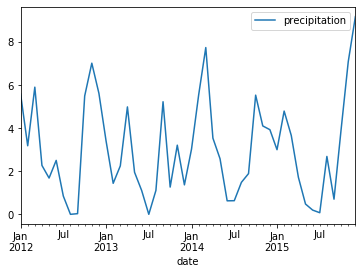

In [180]:
# plotting precipitation over time
pd.DataFrame(wdf['precipitation'].resample('M').mean()).plot()

#### Visualize the amount of wind over time. Choose a time interval you think is appropriate.

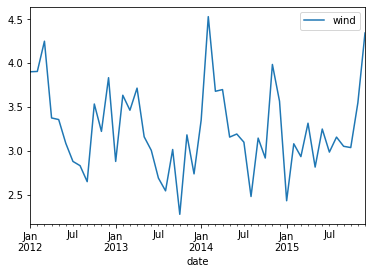

In [182]:
# plotting wind over time
pd.DataFrame(wdf['wind'].resample('M').mean()).plot()

#### Which year-month combination is the windiest?

In [183]:
# resampling dataframe to show avg wind per month
month_avg_wind = pd.DataFrame(wdf['wind'].resample('M').mean())

# finding year/month combo that was the windiest
month_avg_wind[month_avg_wind.wind == month_avg_wind.wind.max()]

,wind
date,
2014-02-28,4.528571


In [184]:
print('February 2014 had the most wind.')

February 2014 had the most wind.


#### What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [193]:
# filtering for only sunny days
sunny_days = wdf[wdf.weather == 'sun']

# simplifying DF to only show weather and date
sunny_days = pd.DataFrame(sunny_days['weather'])

# resampling by year and counting sunny days in each year
sunny_days.resample('Y').count()

,weather
date,
2012-12-31,118
2013-12-31,205
2014-12-31,211
2015-12-31,180


In [195]:
print('2014 is the sunniest year in the dataset since it has the most sunny days.')

2014 is the sunniest year in the dataset since it has the most sunny days.


#### In which month does it rain the most?

In [373]:
# filtering for only rainy days
rainy_days = wdf[wdf.weather == 'rain']

# simplifying DF to only show weather and date
rainy_days = pd.DataFrame(rainy_days['weather'])

# creating column that displays month of each row
rainy_days['month'] = rainy_days.index.month

# grouping by months and counting rows for each month (ie. number of rainy days)
rainy_months = rainy_days.groupby(['month']).count()

# finding month with most rainy days
rainy_months[rainy_months.weather == rainy_months.weather.max()]

,weather
month,
2,40


In [374]:
print('The month with the most rain historically is February.')

The month with the most rain historically is February.


#### Which month has the most number of days with a non-zero amount of precipitation?

In [380]:
# filtering for only non-zero precipitation days
non_0 = wdf[wdf.precipitation > 0]

# simplifying DF to only show date and precipitation value
non_0 = pd.DataFrame(non_0['precipitation'])

# creating column that holds month from date
non_0['month'] = non_0.index.month

# grouping by month and counting rows of each month (ie. number of days with non-zero precipitation)
non_0_months = non_0.groupby(['month']).count()

# finding month with highest precipitation count
non_0_months[non_0_months.precipitation == non_0_months.precipitation.max()]

,precipitation
month,
12,81


In [381]:
print('The month with the most non-zero amount of precipitation historically is December.')

The month with the most non-zero amount of precipitation historically is December.


## FLIGHT DATA QUESTIONS

In [442]:
# acquiring data
fdf = data.flights_20k()

# setting date as index and sorting by date
fdf = fdf.set_index('date').sort_index()

# previewing data
fdf.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


#### Convert any negative delays to 0.

In [443]:
# any negative delay values are converted to 0
fdf['delay'].loc[(fdf['delay'] < 0)] = 0

# previewing data
fdf.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


#### Which hour of the day has the highest average delay?

In [444]:
# copying DF to avoid altering original so we can copy it again for our upcoming questions
fdf_delay = fdf.copy()

# simplifying DF to only hold delay and date
fdf_delay = pd.DataFrame(fdf_delay[['delay']])

# creating new column that holds hour value from time in date
fdf_delay['hour'] = fdf_delay.index.hour

# grouping by hour value and showing average delay of each hour
fdf_hour_delay = fdf_delay.groupby(['hour']).mean()

# looking for highest average delay
fdf_hour_delay[fdf_hour_delay.delay == fdf_hour_delay.delay.max()]

,delay
hour,
3,302.5


In [401]:
print('3AM has the highest average delay.')

3AM has the highest average delay.


#### Does the day of the week make a difference in the delay amount?

In [452]:
# copying DF to avoid altering original so we can copy it again for our upcoming questions
fdf_delay = fdf.copy()

# simplifying DF to only hold delay and date
fdf_delay = pd.DataFrame(fdf_delay[['delay']])

# creating new column that holds day of week value from date
fdf_delay['day_of_week'] = fdf_delay.index.weekday

# grouping by day of week and showing average delay of each day
fdf_weekday_delay = fdf_delay.groupby(['day_of_week']).mean()

# observing results
fdf_weekday_delay

,delay
day_of_week,
0,7.165772
1,9.410866
2,11.032478
3,12.821322
4,17.757596
5,8.431498
6,10.413542


In [453]:
print('Yes, the day of the week makes a difference in the delay amount since each day of the week has a different average delay amount.')

Yes, the day of the week makes a difference in the delay amount since each day of the week has a different average delay amount.


#### Does the month make a difference in the delay amount?

In [457]:
# copying DF to avoid altering original
fdf_delay = fdf.copy()

# creating DF that only holds date and delay
fdf_delay = pd.DataFrame(fdf_delay[['delay']])

# creating column that holds month value from date column
fdf_delay['month'] = fdf_delay.index.month

# grouping by month and displaying average delay per month
fdf_delay.groupby(['month']).mean()

,delay
month,
1,11.301592
2,12.306106
3,9.875287


In [405]:
print('Yes, the month makes a difference in the delay amount since each month has a different average delay amount.')

Yes, the month makes a difference in the delay amount since each month has a different average delay amount.


## TEMPERATURE DATA QUESTIONS (CONTINUED)

In [406]:
# acquiring data
df = data.sf_temps()

# setting date as index and sorting by date
df = df.set_index('date').sort_index()

# previewing data
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


#### Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)

In [417]:
# using cut to categorize all temps into 4 different temp types
df['temp_cat'] = pd.cut(df.temp, 4, labels=["cold", "cool", "warm", "hot"])

# previewing data
df.head()

,temp,temp_cat
date,,
2010-01-01 00:00:00,47.8,cold
2010-01-01 01:00:00,47.4,cold
2010-01-01 02:00:00,46.9,cold
2010-01-01 03:00:00,46.5,cold
2010-01-01 04:00:00,46.0,cold


#### How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.

In [421]:
#### placeholder

#### Create pretty labels for time plots

In [422]:
#### placeholder

#### Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar

In [ ]:
#### placeholder